In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

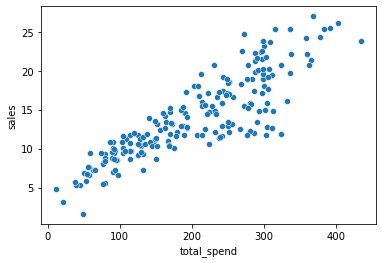

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

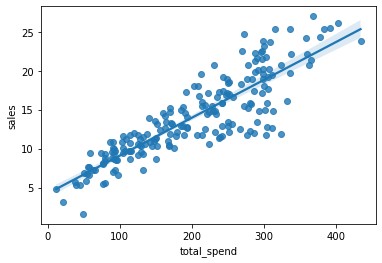

In [7]:
sns.regplot(data=df,x='total_spend',y='sales')

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
#help(np.polyfit)
# y = mx+b
# y = B1x + B0

In [10]:
np.polyfit(X,y,deg=1)
# returning the equation of the linear Regression that approximates each sale if provided with a total_spend value
# the first degree
# y = B1x + B0
potential_spend = np.linspace(0,500,100)

In [11]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

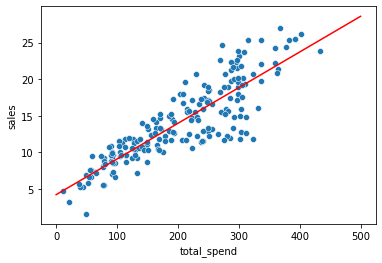

In [12]:
sns.scatterplot(data=df,y='sales',x='total_spend')
plt.plot(potential_spend,predicted_sales,color='red')

In [13]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [14]:
# y = B3x**3 + B2x**2 + B1x +B0
pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

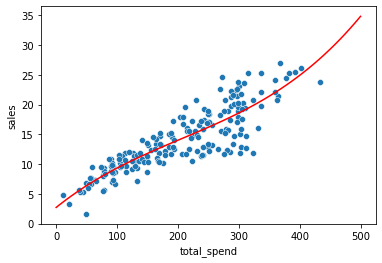

In [15]:
sns.scatterplot(data=df,y='sales',x='total_spend')
plt.plot(pot_spend,pred_sales,color='red')

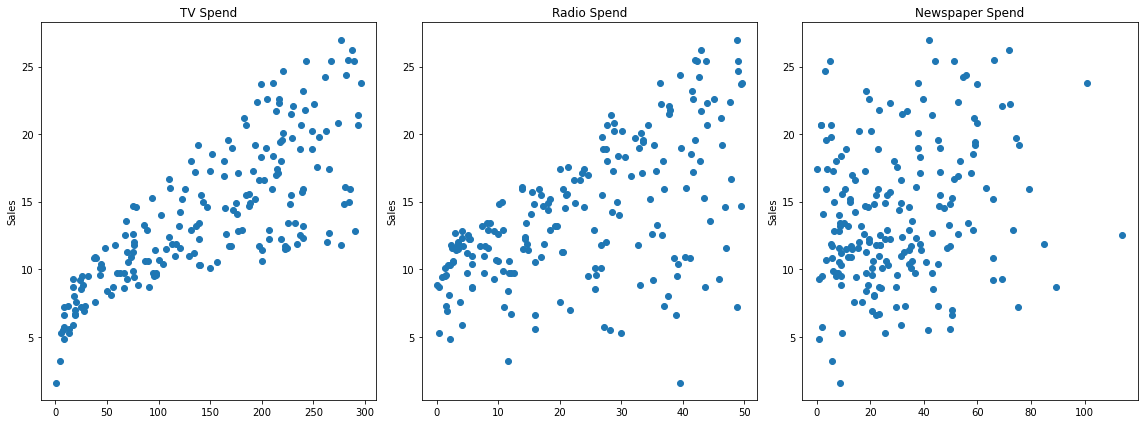

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df["newspaper"],df['sales'],'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [25]:
#X = df.drop("sales",axis=1)

In [17]:
X = df.drop("sales",axis=1)
X

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0
...,...,...,...,...
195,38.2,3.7,13.8,55.7
196,94.2,4.9,8.1,107.2
197,177.0,9.3,6.4,192.7
198,283.6,42.0,66.2,391.8


In [18]:
y = df["sales"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
len(df)

200

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#model.predict(X_test)

In [26]:
# the most common evaluation metrics for regression:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error

In [27]:
X_test.head()

,TV,radio,newspaper,total_spend
37,74.7,49.4,45.7,169.8
109,255.4,26.9,5.5,287.8
31,112.9,17.4,38.6,168.9
89,109.8,47.8,51.4,209.0
66,31.5,24.6,2.2,58.3


In [28]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [29]:
test_predictions = model.predict(X_test)

In [30]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

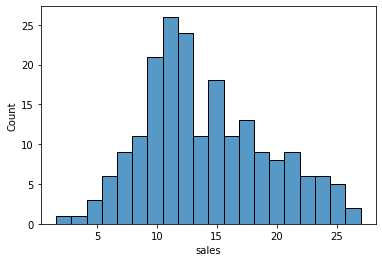

In [33]:
sns.histplot(data=df,x='sales',bins=20)

In [34]:
# comparing the predicted sale values of our model with the real values of sales
mean_absolute_error(y_test,test_predictions)

1.2137457736144817

In [35]:
mean_squared_error(y_test,test_predictions)

2.298716697886384

In [36]:
# root mean squared error RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993897

In [37]:
test_residuals = y_test - test_predictions
# in a perfect model the test_residuals would be zero for each data point

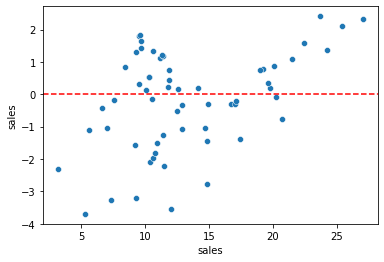

In [38]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

In [39]:
# the data seems to randomly distrisbuted around y=0 axis so there is no clear line or curve
# which makes the linear regression the suitable model for our the data set

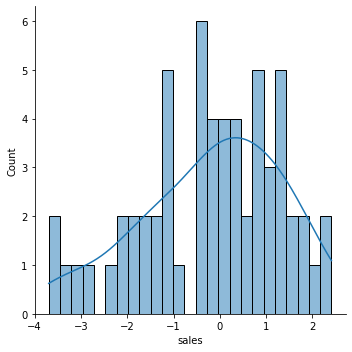

In [40]:
sns.displot(test_residuals,bins=25,kde=True)

In [41]:
# since we are satisfied with the performance(based on our mean absolute error , root mean squared error  ) of our model
# on our previous data set. we apply this model to other new data set.
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [42]:
# returning the beta coefficients of each feature in our model.
final_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [43]:
X.head()

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0


In [44]:
# we notice that the beta coefficient of the newspaper is very small negative value which indicates that the advertising
# on newspaper has no influence on the amount of sales
# the scatterplot above shows us that the data points of  newspaper spend to sales are randomly scattered and
# we can't see any relationship the newspaper spend and the sales

In [56]:
# if we hold radio and newspaper spend fix und we increase the TV spend by 1 unit 
# the sales amount will increase by 0.04576 units .
# the same principle goes for all other features

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [59]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [60]:
polynomial_converter.transform(X)

array([[2.3010000e+02, 3.7800000e+01, 6.9200000e+01, ..., 4.7886400e+03,
        2.3327320e+04, 1.1363641e+05],
       [4.4500000e+01, 3.9300000e+01, 4.5100000e+01, ..., 2.0340100e+03,
        5.8133900e+03, 1.6615210e+04],
       [1.7200000e+01, 4.5900000e+01, 6.9300000e+01, ..., 4.8024900e+03,
        9.1753200e+03, 1.7529760e+04],
       ...,
       [1.7700000e+02, 9.3000000e+00, 6.4000000e+00, ..., 4.0960000e+01,
        1.2332800e+03, 3.7133290e+04],
       [2.8360000e+02, 4.2000000e+01, 6.6200000e+01, ..., 4.3824400e+03,
        2.5937160e+04, 1.5350724e+05],
       [2.3210000e+02, 8.6000000e+00, 8.7000000e+00, ..., 7.5690000e+01,
        2.1697800e+03, 6.2200360e+04]])

In [61]:
polynomial_converter.transform(X).shape

(200, 14)

In [62]:
X.shape

(200, 4)

In [63]:
X.iloc[0]

TV             230.1
radio           37.8
newspaper       69.2
total_spend    337.1
Name: 0, dtype: float64

In [64]:
poly_features = polynomial_converter.transform(X)

In [65]:
poly_features[0]

array([2.3010000e+02, 3.7800000e+01, 6.9200000e+01, 3.3710000e+02,
       5.2946010e+04, 8.6977800e+03, 1.5922920e+04, 7.7566710e+04,
       1.4288400e+03, 2.6157600e+03, 1.2742380e+04, 4.7886400e+03,
       2.3327320e+04, 1.1363641e+05])

In [66]:
polynomial_converter.fit_transform(X)

array([[2.3010000e+02, 3.7800000e+01, 6.9200000e+01, ..., 4.7886400e+03,
        2.3327320e+04, 1.1363641e+05],
       [4.4500000e+01, 3.9300000e+01, 4.5100000e+01, ..., 2.0340100e+03,
        5.8133900e+03, 1.6615210e+04],
       [1.7200000e+01, 4.5900000e+01, 6.9300000e+01, ..., 4.8024900e+03,
        9.1753200e+03, 1.7529760e+04],
       ...,
       [1.7700000e+02, 9.3000000e+00, 6.4000000e+00, ..., 4.0960000e+01,
        1.2332800e+03, 3.7133290e+04],
       [2.8360000e+02, 4.2000000e+01, 6.6200000e+01, ..., 4.3824400e+03,
        2.5937160e+04, 1.5350724e+05],
       [2.3210000e+02, 8.6000000e+00, 8.7000000e+00, ..., 7.5690000e+01,
        2.1697800e+03, 6.2200360e+04]])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
test_predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
MAE = mean_absolute_error(y_test,test_predictions)

In [75]:
MSE = mean_squared_error(y_test,test_predictions)

In [76]:
RMSE = np.sqrt(MSE)

In [77]:
MAE

0.48985222189767014

In [78]:
RMSE

0.6647630323208895

In [79]:
model.coef_

array([-1.03953473e+05, -1.03953511e+05, -1.03953512e+05,  1.03953524e+05,
        4.74072462e+07,  1.63031318e+07,  3.00779757e+06, -1.62502208e+08,
       -3.11041145e+07, -7.55035631e+07, -8.39908473e+07, -4.43994487e+07,
       -7.06955131e+07,  1.15094962e+08])

In [80]:
poly_features[0]

array([2.3010000e+02, 3.7800000e+01, 6.9200000e+01, 3.3710000e+02,
       5.2946010e+04, 8.6977800e+03, 1.5922920e+04, 7.7566710e+04,
       1.4288400e+03, 2.6157600e+03, 1.2742380e+04, 4.7886400e+03,
       2.3327320e+04, 1.1363641e+05])

In [81]:
X.iloc[0]

TV             230.1
radio           37.8
newspaper       69.2
total_spend    337.1
Name: 0, dtype: float64

In [82]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the results (error vs poly order)

In [83]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [84]:
train_rmse_errors

[1.734594124329376,
 0.5878391807935653,
 0.43393443569020673,
 0.35170838088911627,
 0.2509558154847417,
 0.19620886343356347,
 0.21157555794827568,
 0.20247015166501417,
 0.22857556077260752]

In [85]:
test_rmse_errors

[1.5161519375993908,
 0.6647630323208895,
 0.5803286825232545,
 0.5077992081160736,
 2.560657264086891,
 3.405841437871641,
 78.82747022138395,
 1876.3122287173946,
 46953.15701001928]

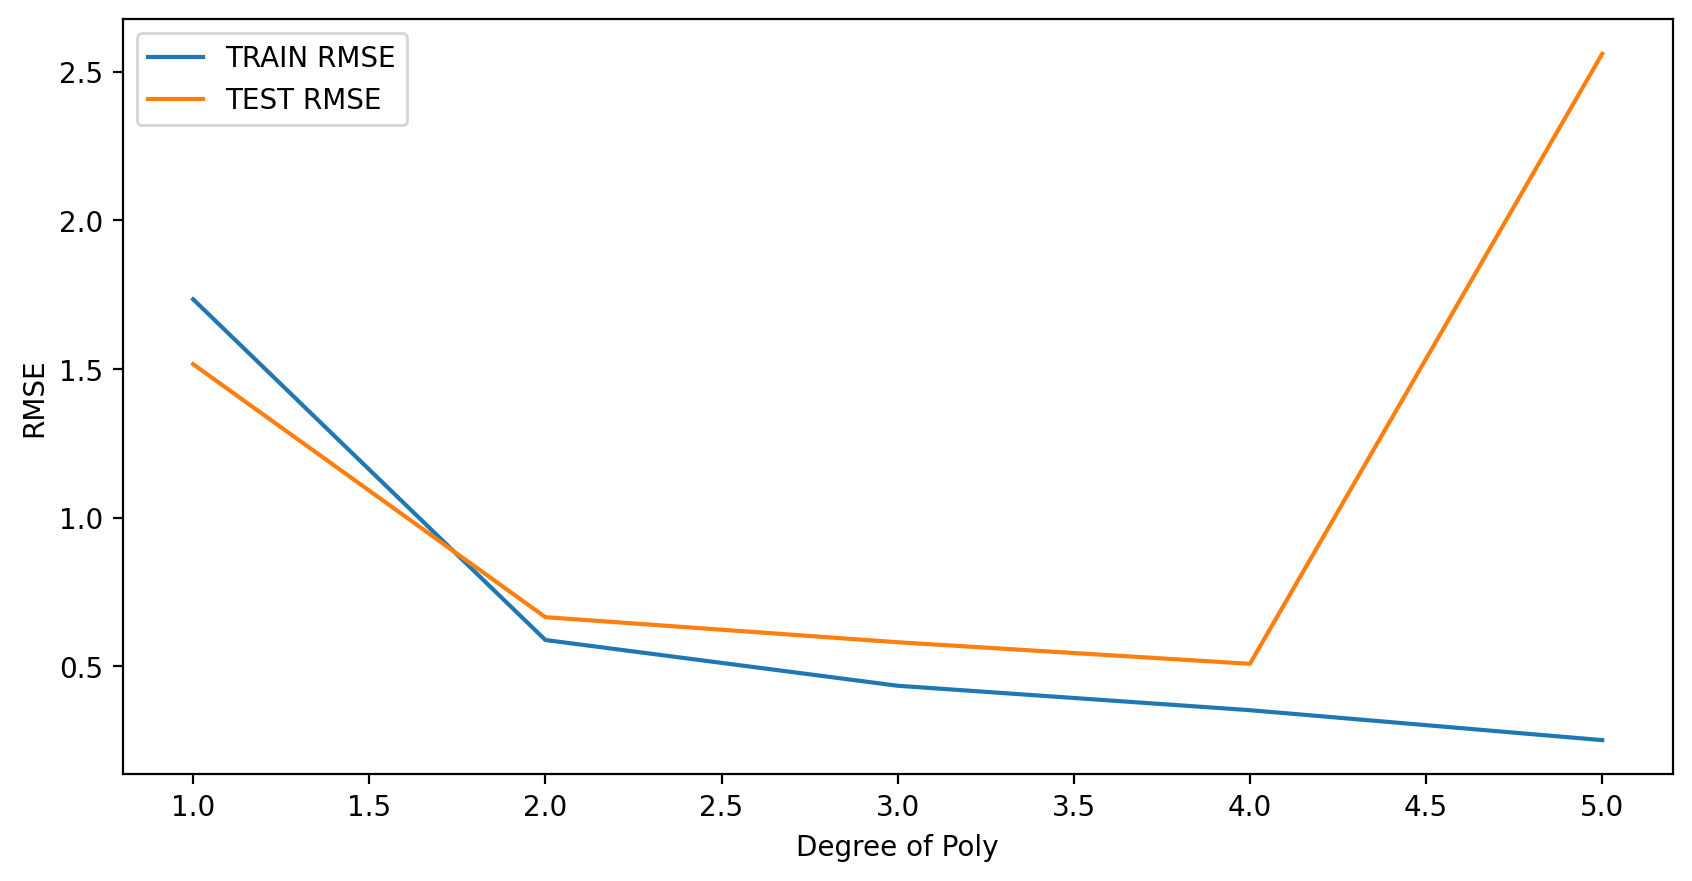

In [86]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [87]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [88]:
final_model = LinearRegression()

In [89]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [90]:
from joblib import dump,load

In [91]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [92]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [93]:
loaded_converter = load('final_converter.joblib')

In [94]:
loaded_model = load('final_poly_model.joblib')

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [102]:
poly_features = polynomial_converter.fit_transform(X)

In [103]:
poly_features.shape

(200, 34)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [106]:
X_train.shape

(140, 34)

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit(X_train)

StandardScaler()

In [110]:
X_train = scaler.transform(X_train)

In [111]:
X_test = scaler.transform(X_test)

In [112]:
X_train[0]

array([ 4.93001715e-01, -3.39942376e-01,  1.61586707e+00,  7.67737727e-01,
        2.84073630e-01, -2.56877571e-02,  1.49677566e+00,  4.75627389e-01,
       -5.90231605e-01,  4.16591545e-01, -2.93361087e-02,  1.61378530e+00,
        1.51382697e+00,  6.53679646e-01,  8.05717198e-02, -5.39222900e-02,
        1.01524393e+00,  2.20790539e-01, -3.69861628e-01,  5.24579673e-01,
        7.09344346e-04,  1.48737034e+00,  1.08768301e+00,  3.58729612e-01,
       -6.60960221e-01, -1.63602417e-01, -4.11259354e-01,  5.46947535e-01,
        4.69327601e-01,  3.21664067e-02,  1.37075536e+00,  1.43175467e+00,
        1.12970726e+00,  4.82204652e-01])

In [113]:
# the data values seems to be a bit smaller
# for comparison purposes we show the unscaled version of data
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 3.37100000e+02,
       5.29460100e+04, 8.69778000e+03, 1.59229200e+04, 7.75667100e+04,
       1.42884000e+03, 2.61576000e+03, 1.27423800e+04, 4.78864000e+03,
       2.33273200e+04, 1.13636410e+05, 1.21828769e+07, 2.00135918e+06,
       3.66386389e+06, 1.78481000e+07, 3.28776084e+05, 6.01886376e+05,
       2.93202164e+06, 1.10186606e+06, 5.36761633e+06, 2.61477379e+07,
       5.40101520e+04, 9.88757280e+04, 4.81661964e+05, 1.81010592e+05,
       8.81772696e+05, 4.29545630e+06, 3.31373888e+05, 1.61425054e+06,
       7.86363957e+06, 3.83068338e+07])

In [114]:
# Ridge Regression is a regularization technique that works by helping reduce
# the poltential for overfitting to the training data
# It does this by adding in a penalty term to the errors that is based on the squared
# value of the coefficients

In [115]:
from sklearn.linear_model import Ridge

In [116]:
ridge_model = Ridge(alpha=10)

In [117]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [118]:
test_predictions = ridge_model.predict(X_test)

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [120]:
MAE = mean_absolute_error(y_test,test_predictions)

In [121]:
MAE

0.5647339341781422

In [122]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [123]:
RMSE

0.8196450170336836

In [124]:
from sklearn.linear_model import RidgeCV

In [125]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [126]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [127]:
ridge_cv_model.alpha_

0.1

In [128]:
test_predictions = ridge_cv_model.predict(X_test)

In [129]:
MAE = mean_absolute_error(y_test,test_predictions)

In [130]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [131]:
MAE

0.4097791353884757

In [132]:
RMSE

0.5956832983775396

In [133]:
from sklearn.linear_model import LassoCV

In [134]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [135]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [136]:
lasso_cv_model.alpha_

0.49430709092258285

In [137]:
test_predictions = lasso_cv_model.predict(X_test)

In [138]:
MAE = mean_absolute_error(y_test,test_predictions)

In [139]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [140]:
MAE

0.6592165262396572

In [141]:
RMSE

1.1205662033660133

In [142]:
lasso_cv_model.coef_

array([ 0.50751593,  0.        , -0.        ,  0.63295875,  0.        ,
        3.63476242,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ])

In [143]:
from sklearn.linear_model import ElasticNetCV

In [144]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],eps=0.001
                            ,n_alphas=100,max_iter=1000000)

In [145]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [146]:
elastic_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [147]:
elastic_model.l1_ratio_

1.0

In [148]:
elastic_model.alpha_

0.004943070909225827

In [149]:
#lasso_cv_model.alpha_

In [150]:
test_predictions = elastic_model.predict(X_test)

In [151]:
MAE = mean_absolute_error(y_test,test_predictions)

In [152]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [153]:
MAE

0.43138168047304565

In [154]:
RMSE

0.600451621355112

In [155]:
elastic_model.coef_

array([ 3.94697525,  0.        ,  0.        ,  1.13582388, -5.15895654,
        4.24700258, -0.2573452 , -0.        , -0.        ,  0.01862342,
        0.        , -0.        , -0.        , -0.        ,  1.84145196,
       -0.5882483 , -0.        ,  0.        ,  0.13013984,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ])